# Introduction

Running a Restaurant is a high Profitable business with considerable low investment after the Initial setup of the business is completed. To Start the aforementioned business there are lot of factors to be consider starting with the investors, capital and including the location factors, geological attributes, population density and Competitors. All these factors when analysed carefully yields in good profits for the business as they show direct effect on the profit/Loss scale.

New York is the most populated city in the in United States and Largest borough by population in New York is Brooklyn. This city has a lot of sectors consisting of people from all over and World spreading across various industries. This City has a lot of immigrants from various parts of the World. This shows that there are huge types of cuisines one can offer in the restaurant business. This city even has people from various native languages and there are many restaurants present in New York including India, Chinese, Italian Etc. Opening a Restaurant here is a good profitable business by carefully analysing the above-mentioned factors. The general initial factors is to knowing the type of restaurant we are willing to start and to know the audience of that particulate classification. Then to determine the location considering the geological and economic factors. Next step is to identify the potential threats to the business such as Competitors, Low Minimum Wage, Increasing Food Prices, Healthier Choices For Customers. Considering all the factors lets analyse Mumbai to open a restaurant for good profits New York has 5 Boroughs and among them there are total of 59 Community Boards

The factors we need to find can be the following
1.	What type of customers we need to attract based the cuisine we offer (Target Audience)
2.	What are the best locations to start the business as to yield good profits?
3.	What are the other similar types of restaurants that might affect our business model (Potential Competitors)?

# Data Section

The below Wikipedia Page has the Details of the different neighbourhoods of New York.

https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City

It has the information of each community Board, it's corresponding borough and details such as area, population Density Etc.
The Population Density in any area has a considerable amount of impact on the profit/Loss of the Restaurant in that area.

--------------------------------------------------------------------------------------------------------------------------------------------------------
The below Page has the Details of the different neighbourhoods of New York.

https://cocl.us/new_york_dataset

This Data set also has the information different borough's and the boundaries in NYC

--------------------------------------------------------------------------------------------------------------------------------------------------------
The below Page has the Details of the different and popular foods around each borough of New YOrk city

https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

This Data set also has the information Popular Food items in/around NYC

--------------------------------------------------------------------------------------------------------------------------------------------------------

The below Page has various types of open data regarding the New York City.

https://data.cityofnewyork.us/

We Select the file Borough Boundaries.
This Dataset has the information of Boundaries and the Geospacial locations of different borough's in NYC. This data will help us in Visualization on Folium Maps which is used for different scenarios while exploring the Data

--------------------------------------------------------------------------------------------------------------------------------------------------------
The below URL is for the Foursquare site

https://foursquare.com/

This Site provides various API calls to Explore the Locations near by or any popular venues in the given Location

--------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from PIL import Image
import urllib
Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/New_York_City_community_districts.svg/902px-New_York_City_community_districts.svg.png'))
Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/5_Boroughs_Labels_New_York_City_Map.svg/450px-5_Boroughs_Labels_New_York_City_Map.svg.png'))

# Methodology

The Analysis part must focus on the Most popular food around each Borough and decide where the restaurant is to be installed.

1.	We will collect the borough information and statistics from the Wikipedia Page

2.	Then We will collect the popular food items in the boroughs of the NY city

3.	The By using Foursquare API we will find the best restaurants in NYC based on the popular food Items

4.	And Also find the Locations where the Restaurants serving the popular food are not abundant

5.	By using the Data lets Visualize the restaurants and the popularity to conclude the best place to Start our Restaurant

Installing and Importing all the essential Libraries

In [ ]:
!pip install geocoder
import geocoder
import os

In [ ]:
!pip install folium
import folium # map rendering library

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

In [ ]:
#Reading the Wikipedia file into the Data frame
#read_html gives the tables in the Page and we are reading the first table
NY_Nbrhds = pd.read_html('https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City')[0]

#Dropping all the rows with any value as NaN (indicating value is null)
NY_Nbrhds.dropna(inplace=True)

In [145]:
#The community borders are numbered accordingly hich are being removed
NY_Nbrhds_illus = NY_Nbrhds
NY_Nbrhds_illus['Community Board(CB)'] = NY_Nbrhds_illus['Community Board(CB)'].str.replace('\d+','')
NY_Nbrhds_illus['Community Board(CB)'] = NY_Nbrhds_illus['Community Board(CB)'].str.replace('CB','')

KeyError: 'Neighborhoods'

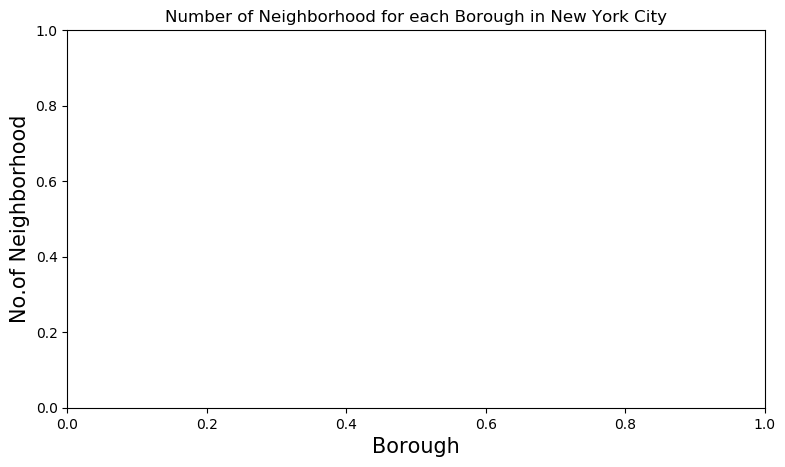

In [148]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
NY_Nbrhds_illus.groupby('Community Board(CB)')['Neighborhoods'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [ ]:
#the below funtion gives the location (latitude,longitude) of all the places in the Dataset
#Using those location information we find the best restaurants in the Community board
#finally thus function returns the best and least rated restaurant in the Community board
def find_locaion(add):
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(add)
        lat = location.latitude
        lon = location.longitude
    except:
        lat=0
        lon=0
    return lat,lon

In [ ]:
CLIENT_ID = 'GOLRPYVZUAMGGNPIVRU4GXWKYFXF2HGKGKPJFQGWV35XIAKY' # your Foursquare ID
CLIENT_SECRET = 'LJVZXCVIC2NRDD30AFN4QJMZAHKWKL0M2C4FTXD3RA04CPM5' # your Foursquare Secret
VERSION = '20200725' # Foursquare API version
Radius = 500
Limit =10

In [ ]:
def get_venues(lat,lon):
    #This url fetches the venues nearby the specified location
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat,
            lon, 
            Radius, 
            Limit)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_names=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            ratings = get_venue_details(venue_id)          
            if 'Restaurant' in venue_category:
                venue_names.append([venue_name,ratings])
        except KeyError:
            pass
    return venue_names

In [ ]:
def get_venue_details(venue_id):

    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_rating=0
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
    except KeyError:
        pass
        
    return venue_rating

In [ ]:
list_n =[]
list_Pl=[]
list_res=[]
#list_rate=[]
for i in range(len(NY_Nbrhds)):
    for j in NY_Nbrhds['Neighborhoods'].loc[i].split(','):
        lat,lon = find_locaion(j)
        venue_names = get_venues(lat,lon)
        list_n.append(NY_Nbrhds['Community Board(CB)'].loc[i])
        list_Pl.append(j)
        list_res.append(venue_names)

In [ ]:
dict_nycr ={}

In [ ]:
dict_nycr['Borough CB'] = list_n
dict_nycr['Places'] = list_Pl
dict_nycr['Restaurants'] = list_res

In [ ]:
dict_nycr#=pd.DataFrame(dict_nycr)